In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [145]:
advertising_data = pd.read_csv('advertisingbucket.csv', encoding = "ISO-8859-1", on_bad_lines='skip', lineterminator='\n')
journalism_data = pd.read_csv('journalismbucket.csv', encoding = "ISO-8859-1", on_bad_lines='skip', lineterminator='\n')
other_data = pd.read_csv('otherbucket.csv', encoding = "ISO-8859-1", on_bad_lines='skip', lineterminator='\n')
advertising_data



,Title,Year Published,Abstracts,professionalism,Unnamed: 4,Unnamed: 5,participants,Unnamed: 7,practices,Unnamed: 9,Unnamed: 10,exemplar,exemplar code,Remarks\r
0,NaN,NaN,NaN,PFR,PFV,PFE,PP1,PP2,PCC,PCD,PCS,NaN,NaN,\r
1,Native Advertising Credibility Perceptions and...,2020.0,The current exploratory research aims to under...,0,1,0,0,1,0,1,0,"""adolescent perceptions"" - PP2\n""less credible...",NaN,\r
2,NaN,NaN,NaN,PFR,PFV,PFE,PP1,PP2,PCC,PCD,PCS,NaN,NaN,\r
3,The Covert Advertising Recognition and Effects...,2020.0,"Covert advertisements, or those that utilize t...",0,1,0,0,1,0,1,0,"""understanding usersÕ psychological responses""...",NaN,\r
4,NaN,NaN,NaN,PFR,PFV,PFE,PP1,PP2,PCC,PCD,PCS,NaN,NaN,\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Point of view: blurred boundaries - where does...,1993.0,Top executives in both advertiser and advertis...,0,1,0,1,0,0,0,0,NaN,NaN,\r
104,NaN,NaN,NaN,PFR,PFV,PFE,PP1,PP2,PCC,PCD,PCS,NaN,NaN,\r
105,Advertising Pressures on Newspapers: A Survey,1992.0,"Although there are numerous anecdotal reports,...",0,1,0,1,0,0,0,1,NaN,NaN,\r
106,NaN,NaN,NaN,PFR,PFV,PFE,PP1,PP2,PCC,PCD,PCS,NaN,NaN,\r


In [146]:
# Cleaning up the Data by Data Selection Using Pandas iloc
## advertising bucket
df_adv_abstract = advertising_data.iloc[1::2, 2]
df_adv_year = advertising_data.iloc[1::2, 1]

## journalism bucket
df_journ_abstract = journalism_data.iloc[1::2, 2] 
df_journ_year = journalism_data.iloc[1::2, 1]

## other bucket
df_other_abstract = other_data.iloc[1::2, 2]
df_other_year = other_data.iloc[1::2, 1]

print(df_adv_year)

1      2020.0
3      2020.0
5      2020.0
7      2020.0
9      2020.0
11     2020.0
13     2020.0
15     2020.0
17     2020.0
19     2020.0
21     2020.0
23     2020.0
25     2020.0
27     2019.0
29     2019.0
31     2019.0
33     2019.0
35     2019.0
37     2019.0
39     2019.0
41     2019.0
43     2019.0
45     2019.0
47     2018.0
49     2018.0
51     2018.0
53     2018.0
55     2017.0
57     2017.0
59     2017.0
61     2017.0
63     2017.0
65     2017.0
67     2017.0
69     2017.0
71     2017.0
73     2017.0
75     2016.0
77     2015.0
79     2012.0
81     2011.0
83     2009.0
85     2007.0
87     2006.0
89     2005.0
91     2004.0
93     1999.0
95     1997.0
97     1995.0
99     1994.0
101    1994.0
103    1993.0
105    1992.0
107    1992.0
Name: Year Published, dtype: float64


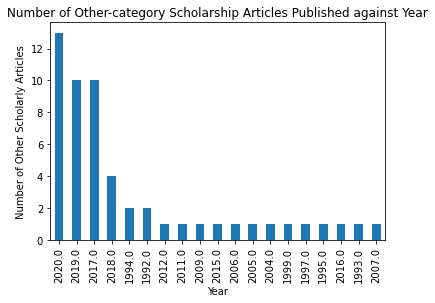

In [165]:
#Testing Variables
journalism_data.loc[journalism_data["Year Published"] == 2020.0]

#Plotting the Variables
x = df_journ_year.value_counts()
x.plot(kind='bar')
plt.title("Number of Journalism Scholarship Articles Published against Year")
plt.xlabel("Year")
plt.ylabel("Number of Journalism Scholarly Articles")
plt.savefig('journalism_bucket_by_year.png', bbox_inches='tight')

y = df_adv_year.value_counts()
y.plot(kind='bar')
plt.title("Number of Advertising Scholarship Articles Published against Year")
plt.xlabel("Year")
plt.ylabel("Number of Advertising Scholarly Articles")
plt.savefig('advertising_bucket_by_year.png', bbox_inches='tight')

z = df_other_year.value_counts()
y.plot(kind='bar')
plt.title("Number of Other-category Scholarship Articles Published against Year")
plt.xlabel("Year")
plt.ylabel("Number of Other Scholarly Articles")
plt.savefig('other_bucket_by_year.png', bbox_inches='tight')

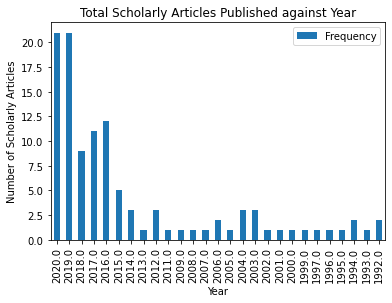

In [194]:
# Combining the three datasets 
frames = [x, y, z]
result = pd.concat(frames)
f = result.to_frame()
f.reset_index(inplace=True)
f.rename(columns={'index': 'Year', 'Year Published':'Frequency'}, inplace=True)
t = f.groupby(['Year']).sum()
v = t.sort_values(by='Year', ascending=False)

#Plotting the three datasets as Total
v.plot(kind='bar')
plt.title("Total Scholarly Articles Published against Year")
plt.xlabel("Year")
plt.ylabel("Number of Scholarly Articles")
plt.savefig('total_by_year_bar.png', bbox_inches='tight')
